<a href="https://colab.research.google.com/github/lutakrystal305/Reinforcement_Learning/blob/main/RL_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15.0 gym stable-baselines gym-anytrading

     |████████████████████████████████| 412.3MB 29kB/s 
     |████████████████████████████████| 245kB 44.1MB/s 
     |████████████████████████████████| 174kB 46.1MB/s 
     |████████████████████████████████| 512kB 42.6MB/s 
     |████████████████████████████████| 3.8MB 49.4MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=570c365bbe0a9623d02037b316a836218debdf3ce574874b00f06b4ad1b13956
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.13.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow-estimat

In [ ]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


**Add Stock.csv**



In [ ]:
df = pd.read_csv('gmeData.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,07/12/2021,191.42,197.75,187.42,189.25,"1,594,440"
1,07/09/2021,190.88,194.78,186.75,191.23,"1,582,925"
2,07/08/2021,179.83,194.22,179.50,191.38,"2,857,514"
3,07/07/2021,196.00,197.50,177.56,190.66,"4,239,500"
4,07/06/2021,204.00,204.77,193.71,199.56,"2,768,062"


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-12,191.42,197.75,187.42,189.25,"1,594,440"
2021-07-09,190.88,194.78,186.75,191.23,"1,582,925"
2021-07-08,179.83,194.22,179.50,191.38,"2,857,514"
2021-07-07,196.00,197.50,177.56,190.66,"4,239,500"
2021-07-06,204.00,204.77,193.71,199.56,"2,768,062"


In [ ]:
df = df.iloc[::-1]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.50,"25,845,900"
2021-03-15,277.52,283.00,206.00,220.14,"24,226,189"
2021-03-16,203.16,220.70,172.35,208.17,"35,422,871"
2021-03-17,217.84,231.47,204.00,209.81,"16,481,590"
2021-03-18,214.00,218.88,195.65,201.75,"11,799,910"


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,70), window_size=5)
print(env.df.shape)

(84, 5)


In [ ]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.2014e+02, -4.4360e+01],
       [ 2.0817e+02, -1.1970e+01],
       [ 2.0981e+02,  1.6400e+00],
       [ 2.0175e+02, -8.0600e+00],
       [ 2.0027e+02, -1.4800e+00],
       [ 1.9449e+02, -5.7800e+00],
       [ 1.8175e+02, -1.2740e+01],
       [ 1.2034e+02, -6.1410e+01],
       [ 1.8375e+02,  6.3410e+01],
       [ 1.8100e+02, -2.7500e+00],
       [ 1.8130e+02,  3.0000e-01],
       [ 1.9446e+02,  1.3160e+01],
       [ 1.8982e+02, -4.6400e+00],
       [ 1.9145e+02,  1.6300e+00],
       [ 1.8695e+02, -4.5000e+00],
       [ 1.8450e+02, -2.4500e+00],
       [ 1.7797e+02, -6.5300e+00],
       [ 1.7026e+02, -7.7100e+00],
       [ 1.5836e+02, -1.1900e+01],
       [ 1.4109e+02, -1.7270e+01],
       [ 1.4099e+02, -1.0000e-01],
       [ 1.6653e+02,  2.5540e+01],
       [ 1.5644e+02, -1.0090e+01],
       [ 1.5469e+02, -1.7500e+00],
       [ 1.6437e+02,  9.6800e+00],
       [ 1.5853e+02, -5.8400e+00],
       [ 1.5851e+02, -2.0000e-02],
       [ 1.5117e+02,

In [ ]:
env.prices  

array([264.5 , 220.14, 208.17, 209.81, 201.75, 200.27, 194.49, 181.75,
       120.34, 183.75, 181.  , 181.3 , 194.46, 189.82, 191.45, 186.95,
       184.5 , 177.97, 170.26, 158.36, 141.09, 140.99, 166.53, 156.44,
       154.69, 164.37, 158.53, 158.51, 151.17, 151.18, 168.93, 177.77,
       178.58, 176.19, 173.59, 162.2 , 160.73, 159.48, 161.01, 161.11,
       143.22, 146.92, 144.79, 164.5 , 159.92, 180.6 , 180.67, 168.83,
       170.49, 176.79, 180.01, 209.43, 242.56, 254.13, 222.  , 249.02,
       282.24, 258.18, 248.36, 280.01, 300.  , 302.56, 220.39, 233.34,
       229.44, 222.5 , 222.97, 223.59, 213.82, 200.37, 220.4 , 219.34,
       212.31, 209.51, 213.25, 210.88, 214.14, 204.36, 202.83, 199.56,
       190.66, 191.38, 191.23, 189.25])

In [ ]:
env.action_space

Discrete(2)

info:  {'total_reward': 81.51000000000005, 'total_profit': 1.3563088322532204, 'position': 0}


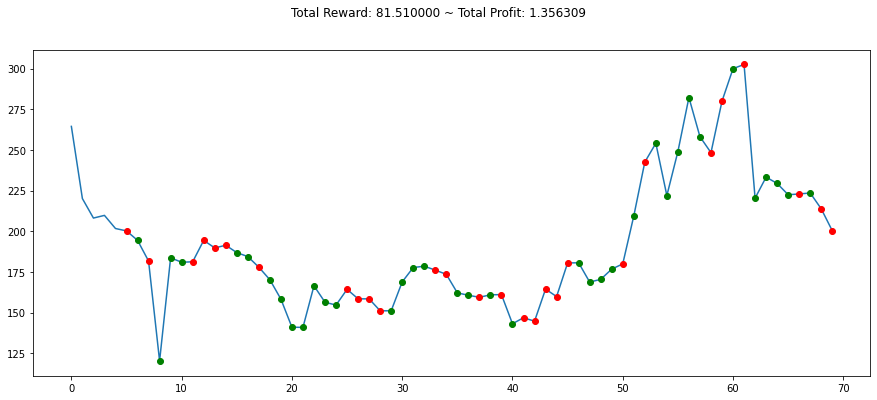

In [ ]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print('info: ', info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,70), window_size=5)
env  = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -544     |
| fps                | 3        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000159 |
---------------------------------
---------------------------------
| explained_variance | -0.00285 |
| fps                | 176      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 26.9     |
---------------------------------
---------------------------------
| explained_variance | -0.00422 |
| fps                | 238     

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(40,85), window_size=5)
obs = env.reset()
_state = []
while True:
    obs = obs[np.newaxis, ...]
    #print('obs: ', obs)
    action, _states = model.predict(obs)
    _state.append(_states)
    obs, reward, done, info = env.step(action)
    if done:
        print('info: ', info)
        #print(_state)
        break
    

info:  {'total_reward': 0.0, 'total_profit': 1.2688586475633, 'position': 1}


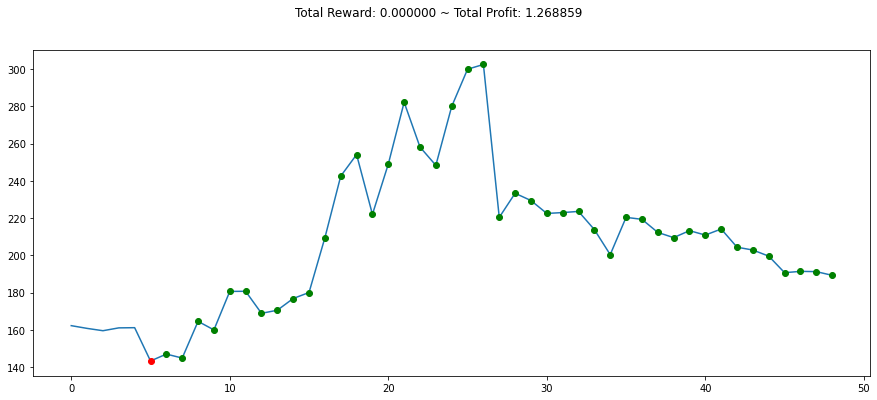

In [ ]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

**2. Custom signal**

In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [ ]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',', '')))

In [ ]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [ ]:
df['SMA'] = TA.SMA(df, 10) #Simple Moving Average
df['RSI'] = TA.RSI(df) #Relative Strength Index
df['OBV'] = TA.OBV(df) #On Balance Volume
df.fillna(0, inplace=True)
df.head(50)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-03-12,275.00,295.50,262.27,264.50,25845900.0,0.000,0.000000,0.0
2021-03-15,277.52,283.00,206.00,220.14,24226189.0,0.000,0.000000,-24226189.0
2021-03-16,203.16,220.70,172.35,208.17,35422871.0,0.000,0.000000,-59649060.0
2021-03-17,217.84,231.47,204.00,209.81,16481590.0,0.000,3.215423,-43167470.0
2021-03-18,214.00,218.88,195.65,201.75,11799910.0,0.000,2.747797,-54967380.0
2021-03-19,195.73,227.00,182.66,200.27,24677301.0,0.000,2.670982,-79644681.0
2021-03-22,205.26,210.36,186.20,194.49,10061510.0,0.000,2.389984,-89706191.0
2021-03-23,197.50,201.75,177.55,181.75,14429150.0,0.000,1.912410,-104135341.0
2021-03-24,157.98,166.97,118.62,120.34,24177881.0,0.000,0.938703,-128313222.0


In [ ]:
def add_signal(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features


In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signal
env2 = MyCustomEnv(df=df, window_size=10, frame_bound=(10,50))

In [ ]:
env2.signal_features

array([[ 2.62270000e+02,  2.58459000e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.06000000e+02,  2.42261890e+07,  0.00000000e+00,
         0.00000000e+00, -2.42261890e+07],
       [ 1.72350000e+02,  3.54228710e+07,  0.00000000e+00,
         0.00000000e+00, -5.96490600e+07],
       [ 2.04000000e+02,  1.64815900e+07,  0.00000000e+00,
         3.21542250e+00, -4.31674700e+07],
       [ 1.95650000e+02,  1.17999100e+07,  0.00000000e+00,
         2.74779665e+00, -5.49673800e+07],
       [ 1.82660000e+02,  2.46773010e+07,  0.00000000e+00,
         2.67098222e+00, -7.96446810e+07],
       [ 1.86200000e+02,  1.00615100e+07,  0.00000000e+00,
         2.38998373e+00, -8.97061910e+07],
       [ 1.77550000e+02,  1.44291500e+07,  0.00000000e+00,
         1.91241015e+00, -1.04135341e+08],
       [ 1.18620000e+02,  2.41778810e+07,  0.00000000e+00,
         9.38703491e-01, -1.28313222e+08],
       [ 1.16900000e+02,  5.09623400e+07,  1.98497000e+02,
         3.67495221e+01

In [ ]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-03-12,275.00,295.50,262.27,264.50,25845900.0,0.0,0.000000,0.0
2021-03-15,277.52,283.00,206.00,220.14,24226189.0,0.0,0.000000,-24226189.0
2021-03-16,203.16,220.70,172.35,208.17,35422871.0,0.0,0.000000,-59649060.0
2021-03-17,217.84,231.47,204.00,209.81,16481590.0,0.0,3.215423,-43167470.0
2021-03-18,214.00,218.88,195.65,201.75,11799910.0,0.0,2.747797,-54967380.0


In [ ]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])


In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
---------------------------------
| explained_variance | 0.997    |
| fps                | 374      |
| nupdates           | 137600   |
| policy_entropy     | 0.000773 |
| total_timesteps    | 688000   |
| value_loss         | 0.00277  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 374      |
| nupdates           | 137700   |
| policy_entropy     | 0.00972  |
| total_timesteps    | 688500   |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 374      |
| nupdates           | 137800   |
| policy_entropy     | 0.00174  |
| total_timesteps    | 689000   |
| value_loss         | 0.00125  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 374      |
| nupdates           | 13

In [ ]:
env = MyCustomEnv(df=df, window_size=10, frame_bound=(30,100))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 139.96, 'total_profit': 1.5100707291935065, 'position': 1}


In [ ]:
a = env.df.loc[:,'SMA'].to_numpy()[20 : 85]
b = np.arange(64)
print(b.shape)
print(a.shape)

(64,)
(64,)


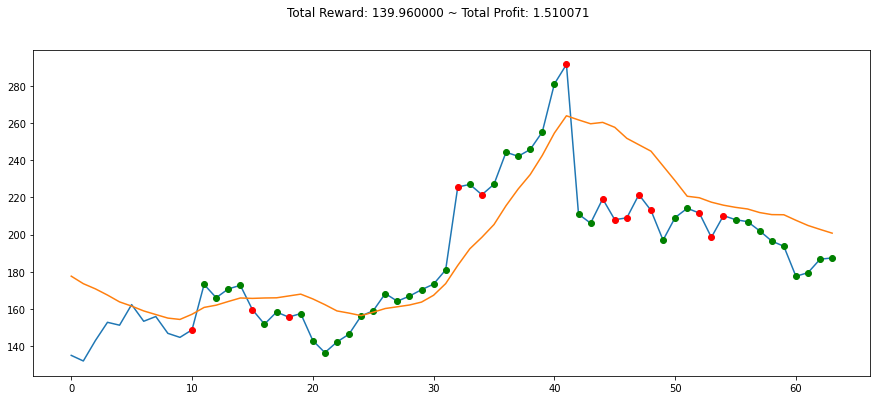

In [ ]:

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.plot(a)
plt.show()